In [1]:
import networkx as nx
from bs4 import BeautifulSoup
import re
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
import requests
import os
import numpy as np
from operator import itemgetter
from collections import Counter
import seaborn as sns
import pandas as pd

%matplotlib notebook
plt.style.use('ggplot')

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
dataYears = ["18", "17", "16", "15", "14", "13"]
dataMonths = ["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"]
# dataYears = ["18"]
# dataMonths = ["jan"]
dataMonths2Dig = ["01", "02", "03", "04", "05", "06", "07", "08", "09","10","11","12"]
dataPath = Path("data")

In [20]:
def dataPreprocessing():
    # in all of these matrices, list[0] -> Male, list[1] -> Female
    avg_ratings_active = [[], []]
    number_of_active = [[], []]
    number_of_active_over2000 = [[], []]
    number_of_active_over2400 = [[], []]
    number_of_inactive = [[], []]
    avg_ratings_inactive = [[], []]
    
    currently_active_M = []
    currently_active_F = []
    
    dataMonthsRev = list(reversed(dataMonths)) # reversing the list because pre august 2016 data had a different organisation within the file
    changeInDataset = True
#     ratingLimit = 2000


    for year in dataYears[::-1]:
        for month in dataMonths:
            folderName = month + year
            print("ON ", folderName)
            if folderName == "sep16":
                changeInDataset = False

            fileName = "standard_" + folderName + "frl.txt"
            with open(dataPath/folderName/fileName, 'r') as myfile:
                num_act = [0, 0]
                num_act_2000 = [0, 0]
                num_act_2400 = [0, 0]
                num_inat = [0, 0]
                
                lines = myfile.readlines()
                for line in tqdm(lines):
                    id = line[:15].strip()

                    if id == 'ID Number': # eliminate file headers
                        continue
                        
                    print(id)

                    name = line[15:76].strip()
                    name = name.replace(',', ';', 10) # replace all commas in name with semicolons, because comma is a delimiter in csv file

                    nat = line[76:80].strip()
        #             sex = line[80]
                    
                    if changeInDataset:
                        rating_str = line[109:115].strip()
                    else:
                        rating_str = line[113:118].strip()

                    if len(rating_str) > 0:
                        rating = int(rating_str)
        #             birth = (line[152:157].strip())

                    if changeInDataset:
                        activity = line[128:].strip()
                    else:
                        activity = line[132:].strip()


                    if 'i' not in activity and 'w' not in activity:
                        num_act[0] += 1
                        avg_ratings_active[0].append(rating)
                    elif 'i' not in activity and 'w' in activity:
                        num_act[1] += 1
                        avg_ratings_active[1].append(rating)
                    
                    if 'i' not in activity and 'w' not in activity and rating > 2000:
                        num_act_2000[0] += 1
                    elif 'i' not in activity and 'w' in activity and rating > 2000:
                        num_act_2000[1] += 1
                        
                    if 'i' not in activity and 'w' not in activity and rating > 2400:
                        num_act_2400[0] += 1
                    elif 'i' not in activity and 'w' in activity and rating > 2400:
                        num_act_2400[1] += 1
                        
                    if 'i' in activity and 'w' not in activity:
                        num_inat[0] += 1
                        avg_ratings_inactive[0].append(rating)
                    elif 'i' in activity and 'w' in activity:
                        num_inat[1] += 1
                        avg_ratings_inactive[1].append(rating)
                
                number_of_active[0].append(num_act[0])
                number_of_active[1].append(num_act[1])
                
                number_of_active_over2000[0].append(num_act_2000[0])
                number_of_active_over2000[1].append(num_act_2000[1])
                
                number_of_active_over2400[0].append(num_act_2400[0])
                number_of_active_over2400[1].append(num_act_2400[1])
                
                number_of_inactive[0].append(num_inat[0])
                number_of_inactive[1].append(num_inat[1])
                        
    
    return avg_ratings_active, number_of_active, number_of_active_over2000, number_of_active_over2400, number_of_inactive, avg_ratings_inactive

In [ ]:
r_act, num_act, num_act_2000, num_act_2400, num_inact, r_inact = dataPreprocessing()

ON  jan13


10207538
10206612
5045886
8605360
5031605
5080444
5706068
10201971
10202650
10210997
24663832
1701991
1513966
1407589
12524670
5072662
25034677
5086183
5027942
25011952
5063485
1427024
1401815
1411802
1017942
1406248
1506064
25021044
10205640
25014510
25030388
35004336
5093295
504599
1402315
1024388
2252465
2218682
1033948
501956
35029185
1504452
1016105
5077702
1509020
25024981
1507362
1010867
1500503
1500660
2009412
5000092
411744
5059100
25043196
5033110
5080584
1024396
1504738
1504711
5083125
1515012
35001302
5086990
1408941
1501607
5045924
5045568
5045932
7102895
8100802
8101043
20621264
681008
602388
22262490
22275274
2215020
2267837
10605240
12528145
2284839
32042752
2072017
1321102
4801628
4162811
14106680
22217959
22217975
2260689
22284605
22297200
22217983
2807882
8100241
5700990
24134171
3400123
616052
3409414
3409422
3401839
3801420
3821994
4185099
3410404
22256164
2276640
4128184
4150392
24141984
34142468
4181867
12539260
13402960
13401580
13401688
3902854
802778
4164229
4

1206958
4636724
740594
4000218
14601770
710490
24641073
1319752
307122
327662
695530
25045601
14923327
2603896
4655850
719471
4110480
1314653
14919052
343625
314706
14902540
14907577
1135414
1148702
1183567
1174312
1146840
1156101
335746
306886
2044145
312770
315702
14528371
308943
1139959
14535092
305065
6400477
6400930
865362
865370
4000870
833851
1611640
14914980
331864
14914999
4250265
14901692
1124790
819123
4212444
4220552
4162862
4152301
24142042
24142050
921971
939099
4650271
1134043
1139967
1176730
1159216
1159224
1114964
410730
212105
401137
3210944
1800400
400041
2009358
411256
422150
1410229
1186370
1101439
1100190
1117980
4179200
4180763
2009730
1171046
653403
2292726
22202951
3514781
3809455
6360017
6384528
4181972
25004409
5067502
5072700
1108417
3406512
1176749
621714
20699506
20695888
3212149
24663891
3508269
408107
874000
22200290
414883
8500282
8500371
689165
13603329
2207885
10604073
8500193
2034778
695548
4661265
12513687
678023
2207494
2003597
2052580
1017640
1033

6374808
6308910
6324070
6347363
7600062
4182278
1715550
1722867
1715810
1305506
1703200
1705040
1700120
13701932
6301282
6325556
6372953
6301363
5060915
13609351
13704079
6201318
12538116
12501417
212156
204439
12531065
12536946
12518344
5092108
35051148
25055950
35035878
25027158
5009367
5079233
25012320
25078909
5052165
24160083
24188026
4114396
4172884
24175145
850756
14201836
4126653
13701258
24108774
13703722
34145700
14122685
24132500
24191787
4129890
34101079
13703706
24164801
24102849
24165719
4136080
24111732
4149068
24158127
7600909
5301874
4180780
2000784
14132958
24188379
6305733
13404024
13401840
24182095
24104680
13601938
22218068
5300797
25016512
25038389
7601794
7600461
25038397
25074024
25090992
4150384
4173090
24129798
4189531
24169188
4185200
4108183
4118146
4150228
4172981
14100231
4161092
6348874
6361897
6301657
6308961
8500886
8500100
4170482
24142107
24124141
24127264
6315062
7601786
505498
6300693
25001647
6319173
13704214
6332919
10602127
607886
4167228
2604290

3406539
3804020
3808025
12520756
13401858
22253807
2210282
2208636
12527130
13502883
12531251
14200325
886653
4217713
4263456
4251180
6315089
24605425
14405466
14523574
6315860
14800047
4639987
841862
12576840
12503797
4129784
4156765
13400797
4174895
13706977
14130017
14000113
24103373
13400789
24191078
24125636
13401564
24133353
13400207
24102717
24121363
24133361
638676
12801780
14111977
819492
4107349
4204654
12564729
13702734
4699505
14400685
12508993
12508632
1120310
915378
4157427
14203308
14401282
4190106
13703951
14204789
13705792
12527149
4185226
4188284
24131091
24142182
14000717
4191323
10205047
13708058
12528897
20667850
12564737
26067714
12509949
2264161
6306233
13404601
2601494
695599
12509957
13501526
11602392
631930
939609
949108
12575054
4167104
13401122
13402617
13404032
14203316
13401505
13408240
13401084
13404610
13402501
13409980
6373810
13409174
2804956
13400754
13408488
13401815
6306462
13401211
12575950
12502103
12524735
12529370
12556637
13400959
12503444
2414

4170547
4197623
4685628
24118702
24657956
25053213
2273705
2291894
22214860
25051300
5084377
25041380
25013726
14310902
25084348
5017521
25024728
5065593
5074754
1438786
5066794
9927018
25034774
35011731
25004450
24117641
4110021
14101203
6303048
24605859
14201038
8102341
884278
4174909
357790
7102585
7101929
4224027
13300059
4151674
912964
943290
1214128
4287720
4273338
4206045
4212746
2907968
2605503
4275063
14119323
13502379
25032720
5102383
32018827
22200053
2287528
5106664
4426355
2148242
35062557
5034744
4607252
428647
25019805
3811590
35032267
620335
800708
5069610
4167252
6700411
12952273
2904802
5106486
5103800
5104688
5083230
13503855
20635494
201596
212180
621196
3822338
1170104
941875
11602198
11602899
9913777
760900
5105838
2217171
1515713
3401030
9913785
1313509
4639472
1504037
1635573
12907286
1272110
1713523
24600539
4619480
1503120
1427180
1428411
1434870
1420119
1404946
1411365
1418394
1408798
1434225
1415735
1504568
1400665
1402714
1403311
1412507
1411853
1403265
150

954136
1158422
1111078
14604574
942766
926850
862150
606871
810436
815306
849995
1906690
5027330
5300843
5900123
4210786
1409271
11604484
604267
24117188
24115738
24124079
24112470
24157031
24153680
4182650
14104890
24118087
2915081
2905078
4191480
24109690
4129334
24186937
2900327
4173112
14116960
4182669
14120143
14700492
14700182
13507125
14113848
1401378
2307987
678155
35032283
25012886
5006392
22218599
756237
735078
14101475
4130863
1176773
2906775
2915235
1403354
24664065
4187350
4144791
4170253
504670
14500264
1903292
1900013
2120615
2126893
1907379
4689135
1916777
22274618
2246341
2293501
3513335
14505878
4620674
4901339
5093775
5011884
35025457
5056195
5032270
4162145
25088572
5028493
24102245
4175387
4122305
4162978
25098705
5002583
25049399
35015141
5046505
5046513
5044596
2285533
25010735
25040359
5023351
25017802
25007670
25017810
5012635
25074113
5012139
5007194
25027182
25053230
5017858
5002591
5024366
5056217
9900438
9913165
5038405
1215396
1215868
5041627
5034752
50052

5046831
4659295
300373
5096006
5079322
7200544
1903128
686824
1114522
5007364
1121677
1176790
1184202
695874
12807761
802972
24631981
4607988
1500279
4647807
3905985
4634071
695882
673404
26021854
24664197
659967
2269104
12926957
12552410
22239561
689548
659975
630489
505633
5088445
25094114
1514059
1707191
20663048
601640
646881
25074210
4667140
2290235
607614
4697219
4643500
22268014
22255320
22243577
12806480
24653870
11100184
643599
845787
1617460
4605039
4609760
12943827
4651774
20685424
829005
4117808
689564
1104926
1103890
20662262
640344
501069
600512
695904
659983
20660871
662801
1022318
623024
5029490
4208455
13306413
12510858
24141135
4148460
4195582
32075367
3511553
3402541
3702073
3702081
3702090
13302051
210595
14104512
13302248
24142360
6346901
832359
880493
22218831
5009502
6330541
6313809
6357741
6346910
13304127
24142379
4177452
4195590
4167295
24142387
4139321
24110795
4182677
4147618
4180836
14122855
13403389
35003038
14400715
14403358
14406080
14403137
14403463
419

1113917
1126350
1136240
20610882
324914
689670
1123963
14906082
1172417
1111957
4168771
4177967
14900980
3004694
1507028
14905965
1149997
13901192
641189
35000888
14127156
14112841
4147260
24180009
24103411
4140710
4130260
24112518
4132653
24124206
4135350
34104639
34104337
14104342
24131016
4158989
24169102
4117824
14130750
4165268
4185234
14100827
34100340
4125223
14128470
4148967
24155055
1166050
21800154
1126920
24695920
1130382
1186183
26040883
34107670
14117940
14116448
742643
737895
728772
737020
701165
711080
709956
755702
718025
748340
767085
12552003
12518417
1203746
2801760
2017385
13901303
763381
763390
716731
20640587
708356
20601808
5020565
32023499
2108828
2108836
2115050
1902733
2104237
2276372
35072480
25016555
25033450
35013050
739162
5005531
35008510
12513210
12513229
869236
1210351
1210688
14105543
2055139
718840
860816
823260
2277468
4411870
5100291
3303195
810363
4216180
4220838
4220846
4217160
11600861
2028824
2116332
2134411
24657700
4262530
2137305
20622910
125

14116464
4148908
14125366
2910373
12802514
14139200
4174941
14105411
24622940
6305105
1021524
676225
20693796
633135
615048
4169280
4165683
4113543
4140532
24196266
4121970
24107700
4155726
4191390
4143272
12802093
12802522
4122615
4188900
4154509
4167333
4120515
24134848
20610505
14602377
24109266
959421
4617304
625728
925225
959430
24601772
24629260
1272092
14103737
20662653
301345
343560
24608106
4195108
34105597
34101230
4116526
14133792
4103904
24119377
24642304
3200655
613169
22237844
20624069
4176111
709310
4231945
14904969
3000443
24107719
24603406
24114308
4166191
14119560
14116545
4129148
4147960
14114119
4167341
14512416
14533529
2019604
24172120
14132982
14136104
24123528
1143620
306460
1124137
7900244
5500028
24664774
13610368
4612337
2021838
600229
14200279
4101936
4116542
1176927
13503200
34141542
34102849
2402254
6200893
3002853
400416
1802755
729299
14909740
14919265
760137
856010
841722
887692
615528
678384
696358
20655347
653020
678392
615668
696366
663751
647004
626

35028111
4134923
4185242
4153707
14531097
24111279
13702777
4191412
25097865
5039169
5093929
4116801
24133396
11603259
24128015
24135518
1175181
14510774
25088602
14401118
24194123
4105427
24183830
24161918
1312294
4643046
22219366
14605007
14604515
14605864
926264
24615765
1187589
1152106
4628179
20617445
24634425
4668383
4902009
4902602
4900936
319988
327530
4601416
340928
312835
1611259
335851
327417
6304354
660078
4123832
12923036
1217941
36014028
6307795
6307973
6305610
6339441
6335845
6300707
4650301
4901541
26004100
14501180
14515636
927252
12800643
1301004
14502720
14114127
14510570
920819
14519500
4627504
24665053
660086
20622996
635391
696650
24687448
24608742
4676068
20699670
425370
26058111
26008467
647080
24624420
4697294
24681059
24647993
868876
647098
663328
26061066
26043351
26043360
618004
652350
1705431
642037
14500574
14106442
14911582
14126478
35023225
5044030
640379
14128314
626813
4108213
14510120
24190314
6300715
14119692
24161977
25008625
3900347
1212257
2410293

13302558
711527
4200446
4206614
4201574
4243412
4630432
24691623
14910802
1312120
805289
2108887
717495
2804340
717460
720097
827940
824461
1011006
1004778
1017721
1800035
854611
814725
809128
4627873
5400015
14907852
14902850
322873
4155084
2804832
2806088
4150953
2805650
4110919
4663900
22274987
22219633
2270641
2214768
32009747
696960
20647093
14300052
20692919
831921
4635973
5500400
5500443
5500311
1704915
5500010
19600135
2261146
615684
4217730
696978
309745
3201759
20616554
673030
200913
605522
26026368
1306146
658537
7901151
696986
608777
629553
26026376
26039044
696994
620181
20630654
623571
612537
627585
1316834
651524
233161
334359
24684520
4207149
7901623
20672225
690589
20620950
7901771
656992
605875
20605293
36001325
697010
7900457
7900015
638269
26084104
26030675
697036
1323946
660191
600237
2016370
626538
5500460
20694393
3510557
26018187
5500370
20677324
657000
681318
613681
697044
7900678
20697260
601381
5502179
637203
690597
697060
627607
5500354
26040336
608017
66020

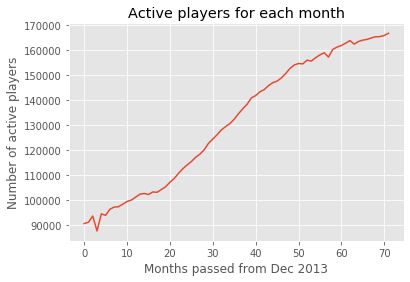

In [12]:
#Plotting total number of active players per month

# _, ax = plt.subplots(1, 1, figsize=(10, 10))

lst = zip(num_act[0], num_act[1])
total_active = []
for x in lst:
    total_active.append(x[0] + x[1])

plt.plot(total_active)
plt.title("Active players for each month")
plt.ylabel("Number of active players")
plt.xlabel("Months passed from Dec 2013")

plt.show()

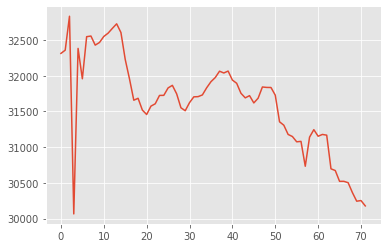

In [13]:
lst = zip(num_act_2000[0], num_act_2000[1])
asd = []
for x in lst:
    asd.append(x[0] + x[1])
# for x in asd:
#     print(x[0] + x[1])
plt.plot(asd, label='active over 2000 ELO')
plt.show()

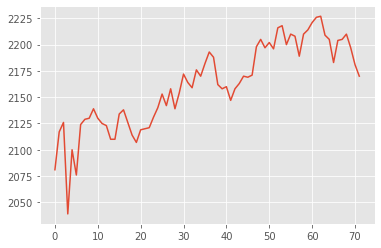

In [16]:
lst = zip(num_act_2400[0], num_act_2400[1])
asd = []
for x in lst:
    asd.append(x[0] + x[1])
# for x in asd:
#     print(x[0] + x[1])
plt.plot(asd, label='active over 2400 ELO')
plt.show()

No handles with labels found to put in legend.


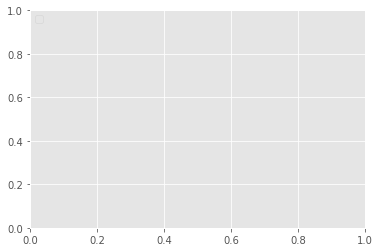

In [15]:
plt.legend(loc='upper left')

In [19]:
#Plotting rating distribution

r_act = r_act[0]+r_act[1]
cnt = Counter(r_act)
ser = pd.DataFrame(cnt.items())

# sns.set_style('darkgrid')
# sns.distplot(ser, color=['b', 'r'])
plt.plot(ser)
plt.show()

TypeError: 'int' object is not subscriptable

In [42]:
ser.head()

,0,1
0,1688,178
1,1708,172
2,1841,163
3,1585,161
4,1839,174
